<a href="https://colab.research.google.com/github/mohmmdkhosravi/git-learning/blob/main/AmirMohammad_Khosravi_finalExam_ML_CUIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/music_dataset.csv
100% 815k/815k [00:00<00:00, 80.4MB/s]
                              name dastgah instrument  zero_corssing  \
0         ney-mahoor-ebrahimi .mp3     D_2        I_4          65545   
1  Mohammad_Shojaei_nei_Mahoor.mp3     D_2        I_4          59788   
2      Arash_Samimi_nei_Mahoor.mp3     D_2        I_4          85072   
3          19 sarebaang mahoor.mp3     D_2        I_4          89980   
4                     Amjadian.mp3     D_2        I_4          58134   

   spectral_centroid_mean  spectral_centroid_var  spectral_rolloff_mean  \
0             1938.040517            303472.4474            2815.166310   
1             1956.981873            774

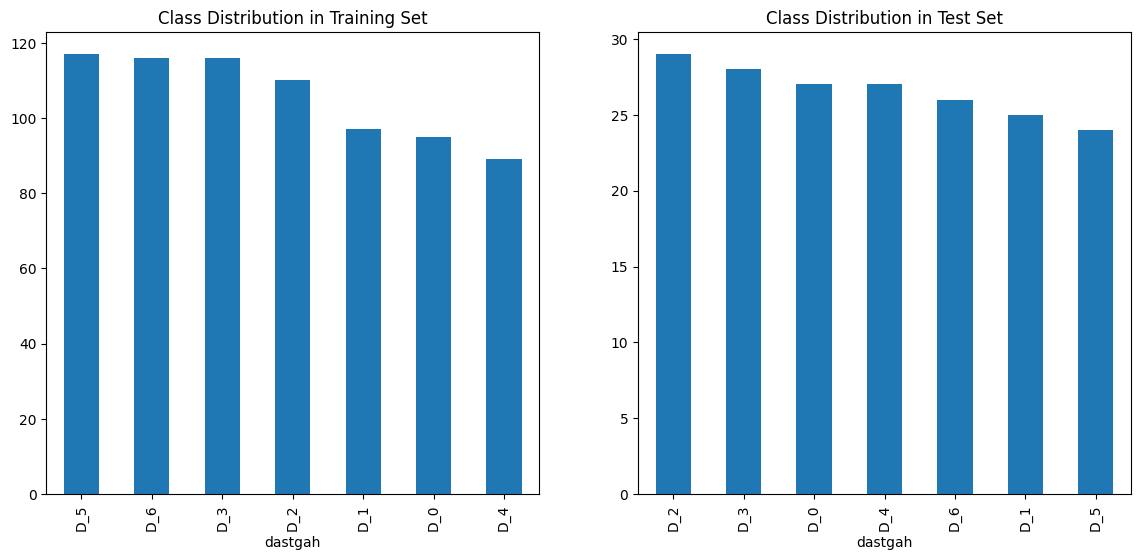

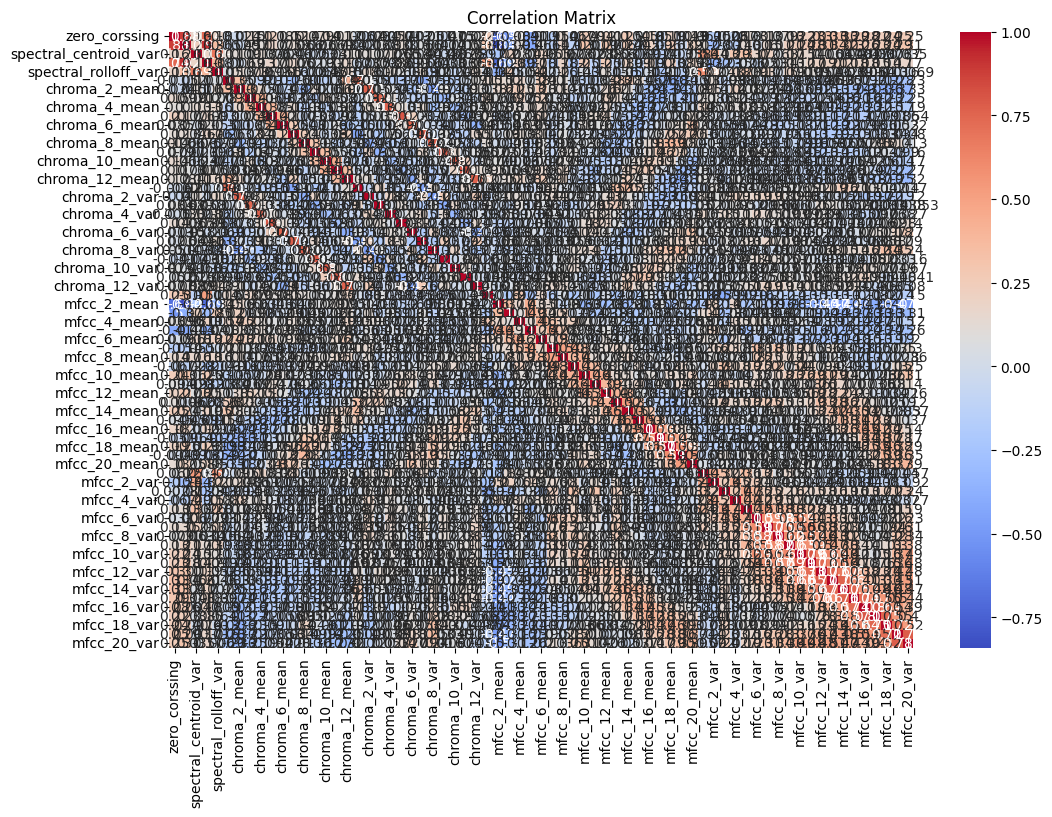

Important features: Index(['zero_corssing', 'chroma_4_mean', 'chroma_9_mean', 'chroma_12_mean',
       'chroma_2_var', 'chroma_4_var', 'chroma_9_var', 'chroma_11_var',
       'chroma_12_var', 'mfcc_14_var'],
      dtype='object')
                  Feature     Score
27          chroma_11_var  8.134031
28          chroma_12_var  6.712505
16         chroma_12_mean  6.201357
20           chroma_4_var  5.920787
0           zero_corssing  5.456939
..                    ...       ...
55             mfcc_7_var  0.821876
29            mfcc_1_mean  0.746588
2   spectral_centroid_var  0.666544
50             mfcc_2_var  0.613926
12          chroma_8_mean  0.469035

[69 rows x 2 columns]


In [10]:
#2.1 :

# ابتدا نصب کتابخانه های مورد نیاز
!pip install pandas matplotlib scikit-learn gdown seaborn

# وارد کردن کتابخانه های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# دانلود داده ها از لینک
!gdown --id 1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK -O music_dataset.csv

# بارگذاری داده ها
data = pd.read_csv('music_dataset.csv')

# نمایش سر داده ها
print(data.head())

# بررسی نوع داده ها
print(data.dtypes)

# حذف ستون های غیر عددی
data = data.select_dtypes(include=[np.number])

# اطمینان از اینکه ستون 'dastgah' در داده ها باقی مانده است
data['dastgah'] = pd.read_csv('music_dataset.csv')['dastgah']

# تقسیم داده ها به دو دسته آموزش و آزمون
X = data.drop('dastgah', axis=1)
y = data['dastgah']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نمایش توزیع کلاسی داده های آموزش و تست
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

y_train.value_counts().plot(kind='bar', ax=ax[0], title='Class Distribution in Training Set')
y_test.value_counts().plot(kind='bar', ax=ax[1], title='Class Distribution in Test Set')

plt.show()

# رسم ماتریس هم بستگی
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# انتخاب مهم ترین ویژگی ها با استفاده از SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)

important_features = X_train.columns[selector.get_support()]
print("Important features:", important_features)

# نمایش امتیازات ویژگی ها
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/music_dataset.csv
100% 815k/815k [00:00<00:00, 121MB/s]
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0

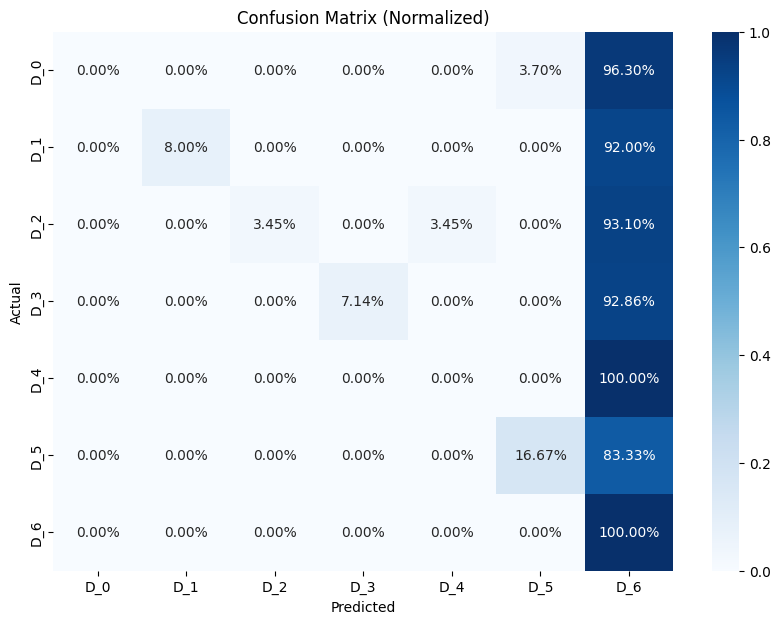

              precision    recall  f1-score   support

         D_0       0.00      0.00      0.00        27
         D_1       1.00      0.08      0.15        25
         D_2       1.00      0.03      0.07        29
         D_3       1.00      0.07      0.13        28
         D_4       0.00      0.00      0.00        27
         D_5       0.80      0.17      0.28        24
         D_6       0.15      1.00      0.26        26

    accuracy                           0.19       186
   macro avg       0.56      0.19      0.13       186
weighted avg       0.56      0.19      0.12       186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#2.2

!pip install pandas matplotlib scikit-learn gdown seaborn
# وارد کردن کتابخانه‌های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# دانلود داده‌ها از لینک
!gdown --id 1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK -O music_dataset.csv

# بارگذاری داده‌ها
data = pd.read_csv('music_dataset.csv')

# حذف ستون‌های غیر عددی
data_numeric = data.select_dtypes(include=[np.number])

# اطمینان از اینکه ستون 'dastgah' در داده‌ها باقی مانده است
data_numeric['dastgah'] = data['dastgah']

# تقسیم داده‌ها به دو دسته آموزش و آزمون
X = data_numeric.drop('dastgah', axis=1)
y = data_numeric['dastgah']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# انتخاب مهم‌ترین ویژگی‌ها با استفاده از SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# تنظیم فراپارامترها با استفاده از GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_selected, y_train)

# نمایش بهترین فراپارامترها
print(f"Best parameters found: {grid.best_params_}")

# پیش‌بینی با مدل بهینه‌شده
grid_predictions = grid.predict(X_test_selected)

# نمایش ماتریس درهم ریختگی
cm = confusion_matrix(y_test, grid_predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2%', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

# گزارش طبقه‌بندی
report = classification_report(y_test, grid_predictions, target_names=grid.classes_)
print(report)

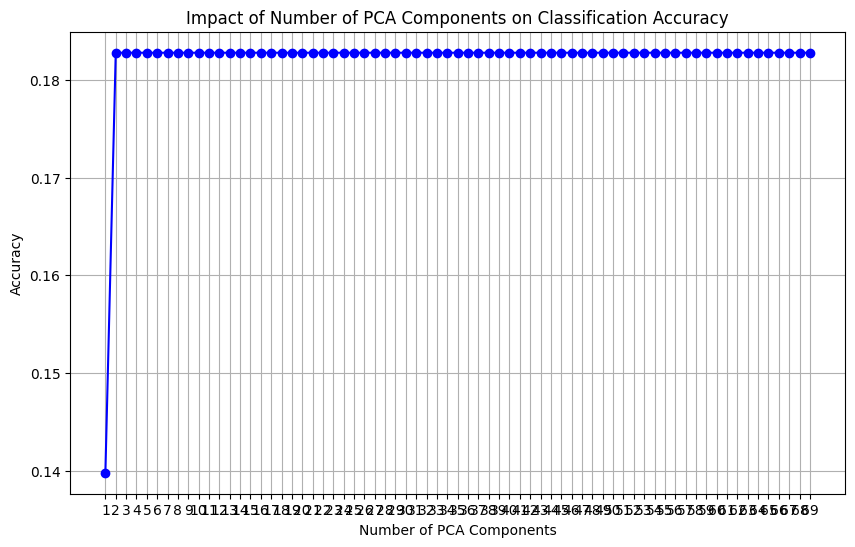

In [14]:
#2.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# بارگذاری داده‌ها
data = pd.read_csv('music_dataset.csv')

# حذف ستون‌های غیر عددی
data_numeric = data.select_dtypes(include=[np.number])
data_numeric['dastgah'] = data['dastgah']

# تقسیم داده‌ها به دو دسته آموزش و آزمون
X = data_numeric.drop('dastgah', axis=1)
y = data_numeric['dastgah']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# اعمال PCA برای کاهش بعد به ۲ مولفه اصلی
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# تحلیل تاثیر تعداد مولفه‌ها بر دقت الگوریتم طبقه‌بندی
components_range = np.arange(1, X_train.shape[1]+1)
accuracy_scores = []

for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm = SVC(kernel='rbf', C=1, gamma='scale')
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# نمایش نمودار تاثیر تعداد مولفه‌ها بر دقت الگوریتم طبقه‌بندی
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Impact of Number of PCA Components on Classification Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.xticks(components_range)
plt.grid(True)
plt.show()


Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 1.2575 - val_loss: 1.2814
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 1.2388 - val_loss: 1.2636
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.2208 - val_loss: 1.2462
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 1.2031 - val_loss: 1.2287
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 1.1856 - val_loss: 1.2110
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 1.1675 - val_loss: 1.1926
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 1.1487 - val_loss: 1.1732
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 1.1297 - val_loss: 1.1531
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 1.1099 - val_loss: 1.1330
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0902 - val_loss: 1.1127
Epoch 11/50
8/8 [=====================

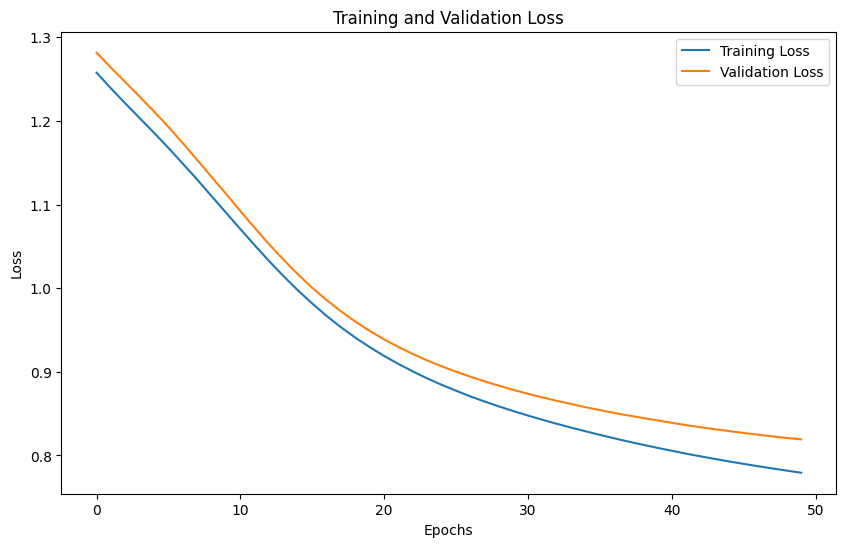

10/10 [==============================] - 0s 3ms/step


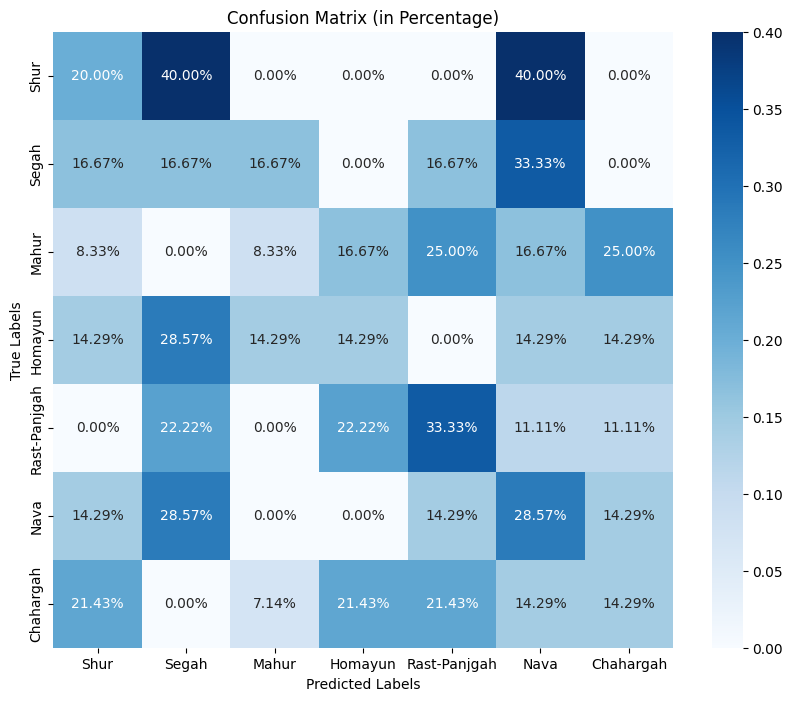

              precision    recall  f1-score   support

        Shur       0.12      0.20      0.15         5
       Segah       0.11      0.17      0.13         6
       Mahur       0.25      0.08      0.12        12
     Homayun       0.12      0.14      0.13         7
Rast-Panjgah       0.27      0.33      0.30         9
        Nava       0.17      0.29      0.21         7
   Chahargah       0.25      0.14      0.18        14

    accuracy                           0.18        60
   macro avg       0.19      0.19      0.18        60
weighted avg       0.20      0.18      0.18        60



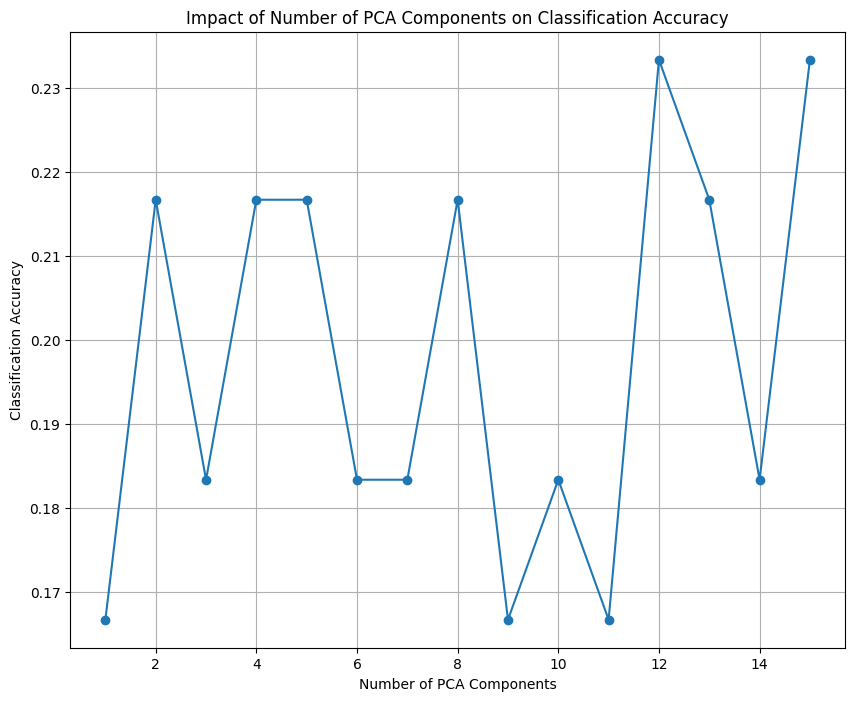

In [23]:
#2.4

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/MJMusicDataset.csv'
data = pd.read_csv(file_path)

# Define the mapping for dastgah codes
dastgah_mapping = {
    'D_0': 'Shur',
    'D_1': 'Segah',
    'D_2': 'Mahur',
    'D_3': 'Homayun',
    'D_4': 'Rast-Panjgah',
    'D_5': 'Nava',
    'D_6': 'Chahargah'
}

# Apply the mapping to the 'dastgah' column
data['dastgah'] = data['dastgah'].map(dastgah_mapping)

# Reduce the size of the dataset for quicker execution
data_sampled = data.sample(n=300, random_state=42)  # Using 300 samples

# Extract a new feature: Energy of the signal from numeric columns
numeric_columns = data_sampled.select_dtypes(include=[np.number]).columns.tolist()
data_sampled['energy'] = data_sampled[numeric_columns].apply(lambda row: np.sum(row**2), axis=1)

# Define features and target variable
X = data_sampled.drop(columns=['name', 'dastgah', 'instrument'])
y = data_sampled['dastgah']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Autoencoder architecture
input_dim = X_scaled.shape[1]
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Split data into training and validation sets
X_train, X_val, _, _ = train_test_split(X_scaled, X_scaled, test_size=0.2, random_state=42)

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract the encoder part of the autoencoder
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Extract the encoded features
encoded_features = encoder_model.predict(X_scaled)

# Use the encoded features for classification
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(encoded_features, data_sampled['dastgah'], test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model_encoded = SVC(kernel='linear', random_state=42)
svm_model_encoded.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_encoded = svm_model_encoded.predict(X_test_encoded)

# Calculate the confusion matrix
conf_matrix_encoded = confusion_matrix(y_test, y_pred_encoded, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_encoded, annot=True, fmt='.2%', cmap='Blues', xticklabels=dastgah_mapping.values(), yticklabels=dastgah_mapping.values())
plt.title('Confusion Matrix (in Percentage)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_encoded, target_names=dastgah_mapping.values()))

# Evaluate the impact of the number of PCA components on classification accuracy
components_range = range(1, 16)
accuracy_scores = []

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(encoded_features)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, data_sampled['dastgah'], test_size=0.2, random_state=42)
    svm_model_pca = SVC(kernel='linear', random_state=42)
    svm_model_pca.fit(X_train_pca, y_train_pca)
    scores = svm_model_pca.score(X_test_pca, y_test_pca)
    accuracy_scores.append(scores)

# Plot the impact of the number of PCA components on accuracy
plt.figure(figsize=(10, 8))
plt.plot(components_range, accuracy_scores, marker='o')
plt.title('Impact of Number of PCA Components on Classification Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.grid()
plt.show()